In [1]:
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.neighbors import kneighbors_graph
import time

import scipy.sparse as sparse
from scipy.stats import multivariate_normal

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger



In [2]:
#generate points
d = 1  #dimension
n = 200 #number of point
n_neighbors = 5

V = np.random.random(n*d).reshape(n,d)
NN = kneighbors_graph(V, n_neighbors, mode='distance').nonzero()


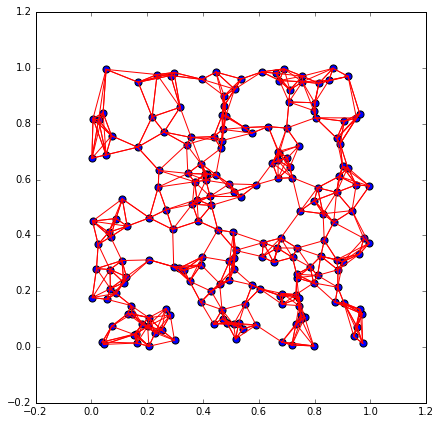

In [3]:
for k in range(n * n_neighbors):
    vertex_start = NN[0][k]
    vertex_end = NN[1][k]
    vertex_start_x = V[vertex_start,0]
    vertex_start_y = V[vertex_start,1]
    vertex_end_x = V[vertex_end,0]
    vertex_end_y = V[vertex_end,1]
    plt.plot([vertex_start_x,vertex_end_x], [vertex_start_y,vertex_end_y], "r-")
    
plt.scatter(V[:,0], V[:,1], s = 50, c="blue")


In [4]:
#create a sparse matrix and put a 1 for each nearest neighbors
Delta = sparse.lil_matrix((n,n))
for k in range(n * n_neighbors):
    Delta[NN[0][k], NN[0][k]] = 1


In [5]:
Delta

<200x200 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in LInked List format>